# DelDOT Revision of Deterioration Models

## Author: Md Shafiul Azam, PhD,PE
### First Written:  February 2, 2021
### Revision: February 23, 2021
### Revision: March 38, 2021

In [ ]:
#The first step is to load data into pandas dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_nmf = pd.read_csv ('G:/My Drive/DelDOT/NetworkMaster2020.csv')
print (df_nmf.head(5))

In [2]:
df_dist2015 = pd.read_csv ('G:/My Drive/DelDOT/Condition Data Prod 2015.csv')
df_dist2017 = pd.read_csv ('G:/My Drive/DelDOT/Condition Data Prod 2017.csv')
df_dist2019 = pd.read_csv ('G:/My Drive/DelDOT/Condition Data Prod 2019.csv')
df_dist2020 = pd.read_csv ('G:/My Drive/DelDOT/Condition Data Prod 2020.csv')

C:\Users\ShafiulAzam\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (26,32,36,39,42,174) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\ShafiulAzam\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (19,21,35,42,46) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\ShafiulAzam\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (19,35,42,46) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\ShafiulAzam\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (42) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised 

In [3]:
df_dist2017.head()

,Effective Date,Year,Route,Direction,Lane,Begin Mile,End Mile,# of Lanes,District ID,Pavement Type,...,HQ Owner,Joint Reflection Low - LF,Joint Reflection Med - LF,Slab Crack High - LF,Slab Crack Low - LF,Slab Crack Medium - LF,Unclassified Cracking High (LF),Unclassified Cracking Low (LF),Unclassified Cracking Med (LF),Crack Seal Candidate (Y/N)
0,11/13/2016,2017,KC-00001-F,N/E,All,0.0,0.1,2.0,Central,Composite,...,Headquarters,26.1,0.0,0.0,0.0,0.0,0.0,24.4,1.6,No
1,11/13/2016,2017,KC-00001-F,N/E,All,0.1,0.2,2.0,Central,Composite,...,Headquarters,0.0,0.0,0.0,0.0,0.0,0.0,17.3,0.3,No
2,11/13/2016,2017,KC-00001-F,N/E,All,0.2,0.3,2.0,Central,Composite,...,Headquarters,0.0,0.0,0.0,0.0,0.0,0.2,8.5,1.7,No
3,11/13/2016,2017,KC-00001-F,N/E,All,0.3,0.4,2.0,Central,Composite,...,Headquarters,23.6,3.9,0.0,0.0,0.0,0.0,11.7,2.2,No
4,11/13/2016,2017,KC-00001-F,N/E,All,0.4,0.5,2.0,Central,Composite,...,Headquarters,17.7,0.0,0.0,0.0,0.0,0.0,11.8,0.8,No


In [4]:
df_dist2019['Pavement Type'].value_counts()

Asphalt      39238
ST           11863
Composite    10623
PCC           2612
Name: Pavement Type, dtype: int64

In [5]:
print ("2019 Number of records before removing duplicates:",len(df_dist2019))
df_nmf=df_nmf.drop_duplicates()
print ("2019 Number of records after removing duplicates:",len(df_dist2019))
df_dist2019=df_dist2019.dropna(subset=['Route', 'Lane','Begin Mile','End Mile'], how='all')
print ("2019 Number of records after dropping null indices:",len(df_dist2019))
print ("2017 Number of records before removing duplicates:",len(df_dist2017))
df_nmf=df_nmf.drop_duplicates()
print ("2017 Number of records after removing duplicates:",len(df_dist2017))
df_dist2017=df_dist2017.dropna(subset=['Route', 'Lane','Begin Mile','End Mile'], how='all')
print ("2017 Number of records after dropping null indices:",len(df_dist2017))
print ("2015 Number of records before removing duplicates:",len(df_dist2015))
df_nmf=df_nmf.drop_duplicates()
print ("2015 Number of records after removing duplicates:",len(df_dist2015))
df_dist2015=df_dist2015.dropna(subset=['Route', 'Lane','Begin Mile','End Mile'], how='all')
print ("2015 Number of records after dropping null indices:",len(df_dist2015))

2019 Number of records before removing duplicates: 64336
2019 Number of records after removing duplicates: 64336
2019 Number of records after dropping null indices: 64336
2017 Number of records before removing duplicates: 63689
2017 Number of records after removing duplicates: 63689
2017 Number of records after dropping null indices: 63674
2015 Number of records before removing duplicates: 62333
2015 Number of records after removing duplicates: 62333
2015 Number of records after dropping null indices: 62313


In [6]:
print ("2020 Number of records before removing duplicates:",len(df_dist2020))
df_nmf=df_nmf.drop_duplicates()
print ("2020 Number of records after removing duplicates:",len(df_dist2020))
df_dist2020=df_dist2020.dropna(subset=['Route', 'Lane','Begin Mile','End Mile'], how='all')
print ("2020 Number of records after dropping null indices:",len(df_dist2020))

2020 Number of records before removing duplicates: 4392
2020 Number of records after removing duplicates: 4392
2020 Number of records after dropping null indices: 4392


In [7]:
dt_2020=df_dist2020.set_index(['Route', 'Lane','Begin Mile','End Mile'])
dt_2019=df_dist2019.set_index(['Route', 'Lane','Begin Mile','End Mile'])
dt_2017=df_dist2017.set_index(['Route', 'Lane','Begin Mile','End Mile'])
dt_2015=df_dist2015.set_index(['Route', 'Lane','Begin Mile','End Mile'])

In [8]:
dt_2019[['OPC Index','Structural Index','Non-Structural Index']]

OPC Index  Structural Index  \
Route       Lane Begin Mile End Mile                                
KC-00001-F  All  0.00       0.12           82.3              83.8   
                 0.12       0.22           86.1              89.9   
                 0.22       0.31           88.2              98.8   
                 0.31       0.40           77.0              94.2   
                 0.40       0.50           80.4              95.0   
...                                         ...               ...   
SC-307555-F All  0.00       0.10           75.9              98.3   
SC-307556-F All  0.00       0.10           88.8              99.3   
                 0.10       0.12           78.0              97.1   
SC-307560-F All  0.00       0.04           77.8              80.9   
SC-307570-F All  0.00       0.08           85.1              86.9   

                                      Non-Structural Index  
Route       Lane Begin Mile End Mile                        
KC-00001-F  All  0.00       0.12                      92.0  
                 0.12       0.22                      88.1  
                 0.22       0.31                      88.7  
                 0.31       0.40                      78.4  
                 0.40       0.50                      81.5  
...                                                    ...  
SC-307555-F All  0.00       0.10                      97.8  
SC-307556-F All  0.00       0.10                      96.8  
                 0.10       0.12                      99.1  
SC-307560-F All  0.00       0.04                      84.4  
SC-307570-F All  0.00       0.08                      91.8  

[64336 rows x 3 columns]

In [9]:
#remove any duplicated indices
dt_2015=dt_2015[~dt_2015.index.duplicated()]
dt_2017=dt_2017[~dt_2017.index.duplicated()]
dt_2019=dt_2019[~dt_2019.index.duplicated()]
dt_2020=dt_2020[~dt_2020.index.duplicated()]

In [11]:
df_const = pd.read_csv (r'G:/My Drive/DelDOT/Construction History DelDOT.csv')
print (df_const.head(5))
df_const.columns

        Route Direction Lane  Begin Mile  End Mile  Length  \
0  SC-00086-F       All    2        0.00      0.54     NaN   
1  SC-00297-F       All    2        1.25      5.43     NaN   
2  SC-00318-F       All  All        2.74      5.85     NaN   
3  SC-00318-F       All  All        2.74      5.85     NaN   
4  SC-00318-F       All  All        2.74      5.85     NaN   

  Constr. History Section            ID  Year Completion           Work Code  \
0            202000308633  202000308633           2020.0  Structural Overlay   
1            202000329701  202000329701           2020.0  Structural Overlay   
2              2020003182    2020003182           2020.0         AC Patching   
3              2020003186    2020003186           2020.0         AC Patching   
4              2020003188    2020003188           2020.0         AC Patching   

   ... Hotmix Tons                    DE LOC COMMENT  DE LOC COST  \
0  ...      919.78  Ave of Honor Georgetown Delaware    129439.56   
1  ...  

Index(['Route', 'Direction', 'Lane', 'Begin Mile', 'End Mile', 'Length',
       'Constr. History Section', 'ID', 'Year Completion', 'Work Code',
       'Project Location Begin', 'Project Location End', 'Typical Section',
       'Treatment', 'Effective Date', 'Derived Func Class ID', 'District ID',
       'Representative District Number', 'Senate District Number',
       'Hotmix Tons', 'DE LOC COMMENT', 'DE LOC COST', 'Percent. Patching',
       'DE RESURF WIDTH', 'Shoulder Thickness', 'HQ Owner', 'DelDot Contract',
       'Shoulder Width', 'Source Table Name'],
      dtype='object')

In [12]:
df_nmf['Pavement Type'].value_counts()

Asphalt      17118
Composite     1094
ST             926
PCC            330
Name: Pavement Type, dtype: int64

In [13]:
#Let's check the construction history routes
df_const[['Route', 'Begin Mile', 'End Mile']]

,Route,Begin Mile,End Mile
0,SC-00086-F,0.00,0.54
1,SC-00297-F,1.25,5.43
2,SC-00318-F,2.74,5.85
3,SC-00318-F,2.74,5.85
4,SC-00318-F,2.74,5.85
...,...,...,...
18712,SC-00413B-F,0.00,1.95
18713,SC-00421-F,7.17,7.40
18714,SC-00431-F,4.42,6.81
18715,SC-00433-F,0.00,0.52


In [15]:
dt_15_17 = pd.concat([dt_2015[['OPC Index','Structural Index','Non-Structural Index']], 
                    dt_2017[['OPC Index','Structural Index','Non-Structural Index']]], axis=1,join="inner")
print('15-17: ',len(dt_15_17))
dt_15_17.columns =['OPC Index 15', 'Structural Index 15', 'Non-Structural Index 15', 'OPC Index 17',
       'Structural Index 17', 'Non-Structural Index 17']

dt_15_19 = pd.concat([dt_15_17[['OPC Index 15', 'Structural Index 15', 'Non-Structural Index 15', 'OPC Index 17',
       'Structural Index 17', 'Non-Structural Index 17']], 
                    dt_2019[['OPC Index','Structural Index','Non-Structural Index']]], axis=1,join="inner")
print('15-19: ',len(dt_15_19))

15-17:  15471
15-19:  9617


In [16]:
dt_15_19.head()

OPC Index 15  Structural Index 15  \
Route       Lane Begin Mile End Mile                                      
NC-006414-F All  0.2        0.27              76.0                 97.8   
NC-006415-F All  0.0        0.09              98.1                 99.7   
KC-00005-R  All  16.8       16.90             71.9                100.0   
KC-00448-F  All  1.1        1.20             100.0                100.0   
                 1.2        1.30             100.0                100.0   

                                      Non-Structural Index 15  OPC Index 17  \
Route       Lane Begin Mile End Mile                                          
NC-006414-F All  0.2        0.27                         76.2          78.1   
NC-006415-F All  0.0        0.09                         98.1          95.3   
KC-00005-R  All  16.8       16.90                        71.9          84.8   
KC-00448-F  All  1.1        1.20                        100.0          87.4   
                 1.2        1.30                        100.0          89.8   

                                      Structural Index 17  \
Route       Lane Begin Mile End Mile                        
NC-006414-F All  0.2        0.27                     93.6   
NC-006415-F All  0.0        0.09                     96.2   
KC-00005-R  All  16.8       16.90                    94.5   
KC-00448-F  All  1.1        1.20                     99.3   
                 1.2        1.30                     99.6   

                                      Non-Structural Index 17  OPC Index  \
Route       Lane Begin Mile End Mile                                       
NC-006414-F All  0.2        0.27                         79.9       67.4   
NC-006415-F All  0.0        0.09                         97.7       89.9   
KC-00005-R  All  16.8       16.90                        85.9       71.2   
KC-00448-F  All  1.1        1.20                         87.6       87.8   
                 1.2        1.30                         90.1       84.8   

                                      Structural Index  Non-Structural Index  
Route       Lane Begin Mile End Mile                                          
NC-006414-F All  0.2        0.27                  89.1                  70.0  
NC-006415-F All  0.0        0.09                  94.4                  91.2  
KC-00005-R  All  16.8       16.90                 82.5                  74.4  
KC-00448-F  All  1.1        1.20                  99.7                  88.0  
                 1.2        1.30                  99.3                  85.1

In [17]:
dt_15_19.columns =['OPC Index 15', 'Structural Index 15', 'Non-Structural Index 15', 'OPC Index 17',
       'Structural Index 17', 'Non-Structural Index 17','OPC Index 19','Structural Index 19','Non-Structural Index 19']
dt_15_19.head()

OPC Index 15  Structural Index 15  \
Route       Lane Begin Mile End Mile                                      
NC-006414-F All  0.2        0.27              76.0                 97.8   
NC-006415-F All  0.0        0.09              98.1                 99.7   
KC-00005-R  All  16.8       16.90             71.9                100.0   
KC-00448-F  All  1.1        1.20             100.0                100.0   
                 1.2        1.30             100.0                100.0   

                                      Non-Structural Index 15  OPC Index 17  \
Route       Lane Begin Mile End Mile                                          
NC-006414-F All  0.2        0.27                         76.2          78.1   
NC-006415-F All  0.0        0.09                         98.1          95.3   
KC-00005-R  All  16.8       16.90                        71.9          84.8   
KC-00448-F  All  1.1        1.20                        100.0          87.4   
                 1.2        1.30                        100.0          89.8   

                                      Structural Index 17  \
Route       Lane Begin Mile End Mile                        
NC-006414-F All  0.2        0.27                     93.6   
NC-006415-F All  0.0        0.09                     96.2   
KC-00005-R  All  16.8       16.90                    94.5   
KC-00448-F  All  1.1        1.20                     99.3   
                 1.2        1.30                     99.6   

                                      Non-Structural Index 17  OPC Index 19  \
Route       Lane Begin Mile End Mile                                          
NC-006414-F All  0.2        0.27                         79.9          67.4   
NC-006415-F All  0.0        0.09                         97.7          89.9   
KC-00005-R  All  16.8       16.90                        85.9          71.2   
KC-00448-F  All  1.1        1.20                         87.6          87.8   
                 1.2        1.30                         90.1          84.8   

                                      Structural Index 19  \
Route       Lane Begin Mile End Mile                        
NC-006414-F All  0.2        0.27                     89.1   
NC-006415-F All  0.0        0.09                     94.4   
KC-00005-R  All  16.8       16.90                    82.5   
KC-00448-F  All  1.1        1.20                     99.7   
                 1.2        1.30                     99.3   

                                      Non-Structural Index 19  
Route       Lane Begin Mile End Mile                           
NC-006414-F All  0.2        0.27                         70.0  
NC-006415-F All  0.0        0.09                         91.2  
KC-00005-R  All  16.8       16.90                        74.4  
KC-00448-F  All  1.1        1.20                         88.0  
                 1.2        1.30                         85.1

In [19]:
#Strictly monotonous decrease
dt_15_19_filtered = dt_15_19[(dt_15_19['OPC Index 15']>dt_15_19['OPC Index 17']) & (dt_15_19['OPC Index 17']>dt_15_19['OPC Index 19'])]
dt_15_19_filtered.head()

OPC Index 15  Structural Index 15  \
Route       Lane Begin Mile End Mile                                      
NC-006415-F All  0.0        0.09              98.1                 99.7   
KC-00448-F  All  1.2        1.30             100.0                100.0   
                 1.3        1.40             100.0                100.0   
                 1.5        1.52              99.8                 99.8   
KC-00449-F  All  0.6        0.61              97.4                 97.4   

                                      Non-Structural Index 15  OPC Index 17  \
Route       Lane Begin Mile End Mile                                          
NC-006415-F All  0.0        0.09                         98.1          95.3   
KC-00448-F  All  1.2        1.30                        100.0          89.8   
                 1.3        1.40                        100.0          90.0   
                 1.5        1.52                        100.0          74.4   
KC-00449-F  All  0.6        0.61                        100.0          90.3   

                                      Structural Index 17  \
Route       Lane Begin Mile End Mile                        
NC-006415-F All  0.0        0.09                     96.2   
KC-00448-F  All  1.2        1.30                     99.6   
                 1.3        1.40                     99.0   
                 1.5        1.52                     95.3   
KC-00449-F  All  0.6        0.61                     98.5   

                                      Non-Structural Index 17  OPC Index 19  \
Route       Lane Begin Mile End Mile                                          
NC-006415-F All  0.0        0.09                         97.7          89.9   
KC-00448-F  All  1.2        1.30                         90.1          84.8   
                 1.3        1.40                         90.4          86.8   
                 1.5        1.52                         76.6          49.4   
KC-00449-F  All  0.6        0.61                         99.9          25.1   

                                      Structural Index 19  \
Route       Lane Begin Mile End Mile                        
NC-006415-F All  0.0        0.09                     94.4   
KC-00448-F  All  1.2        1.30                     99.3   
                 1.3        1.40                     99.7   
                 1.5        1.52                     97.9   
KC-00449-F  All  0.6        0.61                     92.9   

                                      Non-Structural Index 19  
Route       Lane Begin Mile End Mile                           
NC-006415-F All  0.0        0.09                         91.2  
KC-00448-F  All  1.2        1.30                         85.1  
                 1.3        1.40                         87.1  
                 1.5        1.52                         80.2  
KC-00449-F  All  0.6        0.61                         62.7

In [20]:
dt_15_19_filtered=dt_15_19_filtered.reset_index()
print(len(dt_15_19_filtered))

4438


In [28]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [21]:
dt_nmf_const= pd.merge(left=df_const, right=df_nmf, how='left', left_on='Route', right_on='Route')
dt_nmf_const =dt_nmf_const[(dt_nmf_const['End Mile_x'] <= dt_nmf_const['End Mile_y']) & 
         (dt_nmf_const['Begin Mile_x'] >= dt_nmf_const['Begin Mile_y'])]
dt_15_19_fil_const= pd.merge(left=dt_15_19_filtered, right=dt_nmf_const, how='left', left_on='Route', right_on='Route')

print(dt_15_19_fil_const.columns)
print (len(dt_15_19_fil_const))

Index(['Route', 'Lane_x', 'Begin Mile', 'End Mile', 'OPC Index 15',
       'Structural Index 15', 'Non-Structural Index 15', 'OPC Index 17',
       'Structural Index 17', 'Non-Structural Index 17',
       ...
       'HQ Owner_y', 'Last Chip Seal Year', 'Years Since Last Chipseal',
       'Last Crack Sealing Year', 'Years Since Last Crack Seal',
       'Year of Last Preservation', 'Years Since Last Preservation',
       'Preservation Count', 'RSL', 'Is Ramp?'],
      dtype='object', length=176)
25093


In [22]:
dt_15_19_fil_const.head(2)

,Route,Lane_x,Begin Mile,End Mile,OPC Index 15,Structural Index 15,Non-Structural Index 15,OPC Index 17,Structural Index 17,Non-Structural Index 17,...,HQ Owner_y,Last Chip Seal Year,Years Since Last Chipseal,Last Crack Sealing Year,Years Since Last Crack Seal,Year of Last Preservation,Years Since Last Preservation,Preservation Count,RSL,Is Ramp?
0,NC-006415-F,All,0.0,0.09,98.1,99.7,98.1,95.3,96.2,97.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KC-00448-F,All,1.2,1.30,100.0,100.0,100.0,89.8,99.6,90.1,...,Headquarters,2007.0,13.0,NaN,NaN,NaN,NaN,0.0,7.7812,No


In [23]:
dt_15_19_fil_const_exp = dt_15_19_fil_const[(dt_15_19_fil_const['Lane_x'] == dt_15_19_fil_const['Lane_y']) &
         (dt_15_19_fil_const['End Mile'] <= dt_15_19_fil_const['End Mile_x']) & 
         (dt_15_19_fil_const['Begin Mile'] >= dt_15_19_fil_const['Begin Mile_x'])]

print(len(dt_15_19_fil_const_exp))

9185


In [24]:
df1=dt_15_19_fil_const_exp[['Route',
'Lane_x',
'Begin Mile',
'End Mile',
'OPC Index 15',
'Structural Index 15',
'Non-Structural Index 15',
'OPC Index 17',
'Structural Index 17',
'Non-Structural Index 17',
'Year Completion',
'Work Code_x',
'Road Structure Category',
'Func Class ID',
'AADT',                           
'Pavement Age',
'Pavement Type'
]]
df1['Pavement Age'] = df1['Pavement Age'].apply(lambda x: x - 5)

df2=dt_15_19_fil_const_exp[['Route',
'Lane_x',
'Begin Mile',
'End Mile',
'OPC Index 17',
'Structural Index 17',
'Non-Structural Index 17',
'OPC Index 19',
'Structural Index 19',
'Non-Structural Index 19',
'Year Completion',
'Work Code_x',
'Road Structure Category',
'Func Class ID',
'AADT',                           
'Pavement Age',
'Pavement Type'                            
]]
df2['Pavement Age'] = df2['Pavement Age'].apply(lambda x: x - 3)

df1.columns=['Route', 'Lane_x', 'Begin Mile', 'End Mile', 'OPC Index', 'Structural Index', 'Non-Structural Index',
             'OPC Index+2', 'Structural Index+2', 'Non-Structural Index+2',
             'Year Completion', 'Work Code_x', 'Road Structure Category', 'Func Class ID','AADT','Pavement Age','Pavement Type']
df2.columns=['Route', 'Lane_x', 'Begin Mile', 'End Mile', 'OPC Index', 'Structural Index', 'Non-Structural Index',
             'OPC Index+2', 'Structural Index+2', 'Non-Structural Index+2',
             'Year Completion', 'Work Code_x', 'Road Structure Category', 'Func Class ID','AADT','Pavement Age','Pavement Type']

<ipython-input-24-b4ef3ab57959>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Pavement Age'] = df1['Pavement Age'].apply(lambda x: x - 5)
<ipython-input-24-b4ef3ab57959>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Pavement Age'] = df2['Pavement Age'].apply(lambda x: x - 3)


In [25]:
df12 = pd.concat([df1,df2])
df12=df12[df12['Pavement Age']>=0]
print ("Number of records before removing duplicates:",len(df12))
df12=df12.drop_duplicates()
print ("Number of records after removing duplicates:",len(df12))

Number of records before removing duplicates: 18195
Number of records after removing duplicates: 17914


In case we need to export to csv: 
df12.to_csv(r'C:/Users/sazam/Desktop/Shafiul Docs/DelDOT/df12.csv', index = False)

(0.0, 100.0)

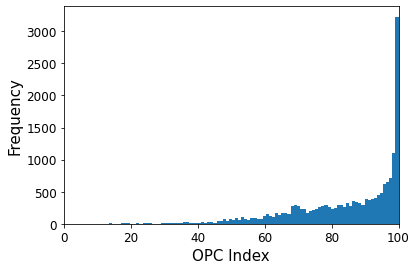

In [26]:
import seaborn as sns
df12['OPC Index'].hist(bins=100, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("OPC Index", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.xlim([0,100])

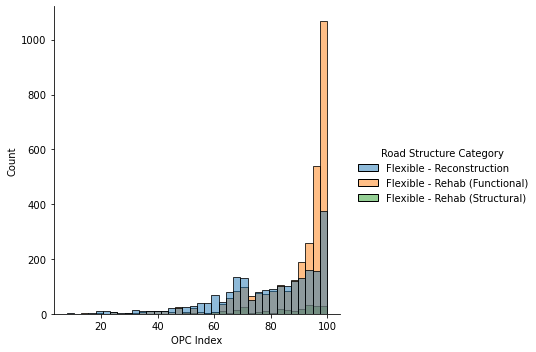

In [27]:
flexible_rsc = ['Flexible - Reconstruction', 'Flexible - Rehab (Functional)', 'Flexible - Rehab (Structural)']
dt=df12[df12["Road Structure Category"].isin(flexible_rsc)]
sns.displot(dt, x="OPC Index", hue="Road Structure Category")

In case we need to export to csv:
dt.to_csv(r'C:/Users/sazam/Desktop/Shafiul Docs/DelDOT/dt_sample.csv', index = False)

(0.0, 20000.0)

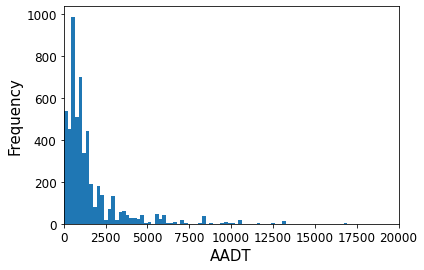

In [28]:
dt['AADT'].hist(bins=100, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("AADT", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.xlim([0,20000])

In [29]:
dt['AADT_Class'] = dt['AADT'].apply(lambda x: '>10000' if x>10000
                                                       else ('5001-10000' if x>5000 and x <= 10000
                                                       else ('2501-5000'  if x>2500 and x <= 5000
                                                       else '<=2500')))

<ipython-input-29-4969927d1674>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['AADT_Class'] = dt['AADT'].apply(lambda x: '>10000' if x>10000


In [30]:
dt['OPC_Class'] = dt['OPC Index'].apply(lambda x: '>80' if x>80
                                                       else ('31-80' if x>30 and x <= 80
                                                       else '<30'))

<ipython-input-30-61f1fc501545>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['OPC_Class'] = dt['OPC Index'].apply(lambda x: '>80' if x>80


In [31]:
dt["Road Structure Category"].value_counts()

Flexible - Rehab (Functional)    3072
Flexible - Reconstruction        2174
Flexible - Rehab (Structural)     236
Name: Road Structure Category, dtype: int64

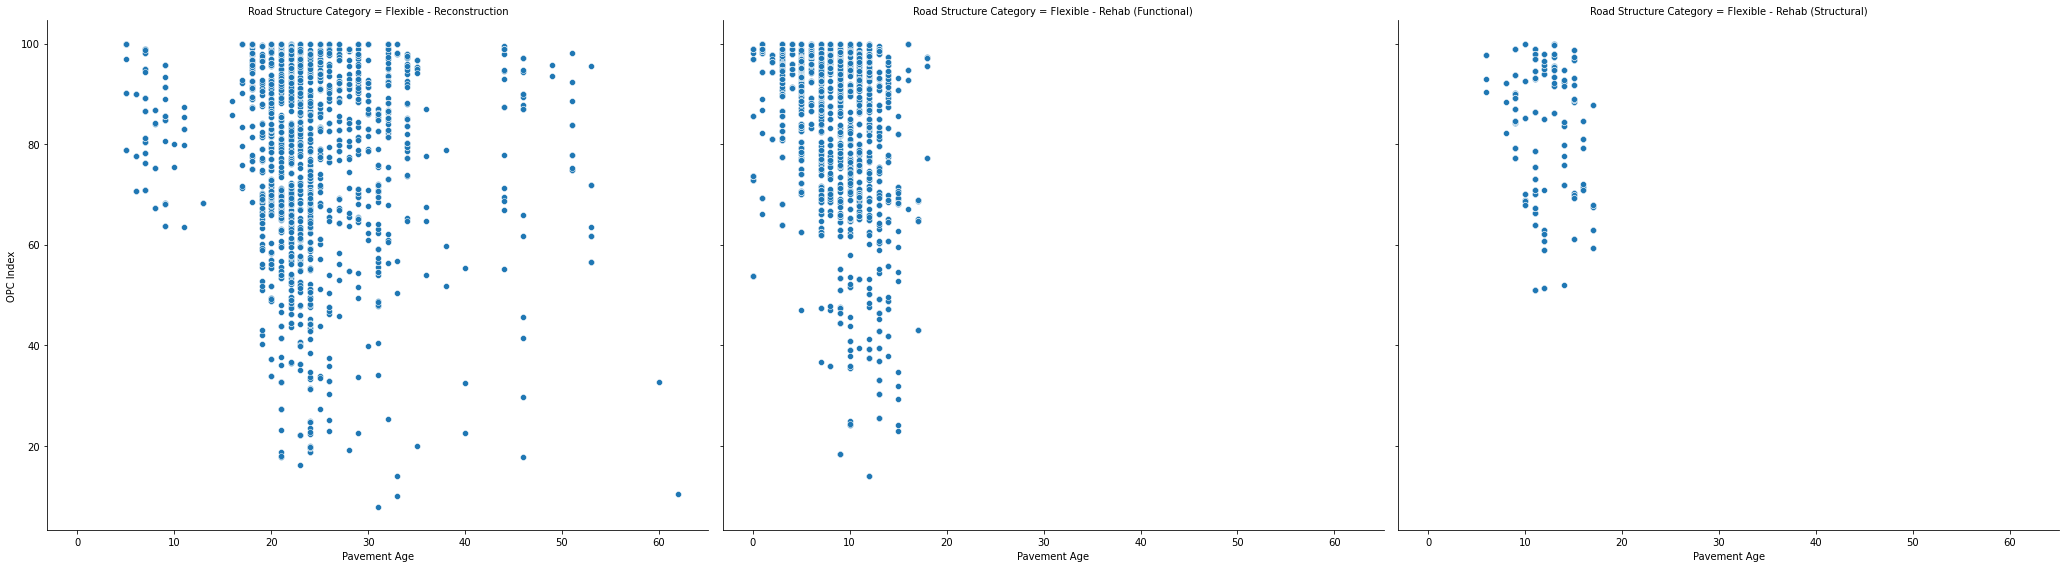

In [32]:
g=sns.FacetGrid(dt, col="Road Structure Category", height=8, aspect=1.2)
g.map(sns.scatterplot, "Pavement Age", "OPC Index")

In [33]:
dt = dt.assign(**{'OPC Index+1': (lambda x: ((x['OPC Index']+x['OPC Index+2']) /2))}) 
dt = dt.assign(**{'Structural Index+1': (lambda x: ((x['Structural Index']+x['Structural Index+2']) /2))}) 
dt = dt.assign(**{'Non-Structural Index+1': (lambda x: ((x['Non-Structural Index']+x['Non-Structural Index+2']) /2))}) 
dt.head(5)

,Route,Lane_x,Begin Mile,End Mile,OPC Index,Structural Index,Non-Structural Index,OPC Index+2,Structural Index+2,Non-Structural Index+2,...,Road Structure Category,Func Class ID,AADT,Pavement Age,Pavement Type,AADT_Class,OPC_Class,OPC Index+1,Structural Index+1,Non-Structural Index+1
48,NC-00487-F,All,0.3,0.4,85.8,86.3,95.0,77.8,79.7,97.9,...,Flexible - Reconstruction,MinColl,2898.0,16.0,Asphalt,2501-5000,>80,81.80,83.00,96.45
62,NC-00485-F,All,0.6,0.7,42.1,46.6,66.7,17.8,26.2,68.8,...,Flexible - Reconstruction,Locals,726.0,19.0,Asphalt,<=2500,31-80,29.95,36.40,67.75
65,NC-00485-F,All,0.7,0.8,67.1,83.0,67.7,55.6,60.5,71.9,...,Flexible - Reconstruction,Locals,726.0,19.0,Asphalt,<=2500,31-80,61.35,71.75,69.80
67,NC-00503-F,All,0.1,0.2,65.2,99.3,65.3,54.5,76.0,59.5,...,Flexible - Reconstruction,Locals,130.0,19.0,Asphalt,<=2500,31-80,59.85,87.65,62.40
68,NC-00503-F,All,0.2,0.3,69.5,98.2,69.7,66.9,89.0,69.3,...,Flexible - Reconstruction,Locals,130.0,19.0,Asphalt,<=2500,31-80,68.20,93.60,69.50


In [34]:
dt.describe()

,Begin Mile,End Mile,OPC Index,Structural Index,Non-Structural Index,OPC Index+2,Structural Index+2,Non-Structural Index+2,Year Completion,AADT,Pavement Age,OPC Index+1,Structural Index+1,Non-Structural Index+1
count,5482.000000,5482.000000,5482.000000,5478.000000,5478.000000,5482.000000,5478.000000,5478.00000,5482.000000,5356.000000,5482.000000,5482.000000,5478.000000,5478.000000
mean,0.737373,0.833756,84.991244,91.439266,91.489887,73.349872,83.483461,88.90858,2000.941992,1507.808420,13.925027,79.170558,87.461364,90.199233
std,1.199587,1.199080,16.426489,13.897282,10.886151,22.768134,19.798492,11.86342,9.336339,1894.689974,9.361130,18.856825,16.270542,10.442200
min,0.000000,0.010000,7.900000,16.100000,48.600000,0.000000,2.900000,32.60000,1955.000000,22.000000,0.000000,3.950000,9.750000,44.900000
25%,0.100000,0.200000,75.100000,89.500000,86.100000,60.200000,76.800000,81.90000,1994.000000,539.000000,7.000000,67.900000,83.912500,84.850000
50%,0.400000,0.500000,91.600000,97.900000,96.900000,79.200000,91.600000,93.60000,2003.000000,935.000000,11.000000,84.800000,94.150000,94.300000
75%,0.900000,1.000000,97.800000,99.800000,99.900000,92.900000,98.000000,98.27500,2008.000000,1655.000000,22.000000,94.887500,98.650000,98.400000
max,14.100000,14.160000,100.000000,100.000000,100.000000,99.000000,100.000000,100.00000,2019.000000,21724.290000,62.000000,99.500000,100.000000,100.000000


In [35]:
exceptions = []
for i in dt[
    ((dt['Pavement Age']>=10)& (dt['OPC Index']>90)) |
    ((dt['Pavement Age']>=20)& (dt['OPC Index']>70)) |
    ((dt['Pavement Age']>=30)& (dt['OPC Index']>60))|
    ((dt['Pavement Age']<5)& (dt['OPC Index']<90))].index:
    exceptions.append(i)

print (len(exceptions))
xydata_new= dt[~dt.index.isin(exceptions)]
xydata_new = xydata_new[xydata_new['Pavement Type']=='Asphalt']
xydata_new['Pavement Type'].value_counts()

1969


Asphalt    2782
Name: Pavement Type, dtype: int64

In [36]:
dt['Pavement Type'].value_counts()

Asphalt      4348
ST           1116
Composite      16
PCC             2
Name: Pavement Type, dtype: int64

In [53]:
xydata_new['Pavement Type'].value_counts()

Asphalt    2782
Name: Pavement Type, dtype: int64

In [37]:
xydata_ST= dt[~dt.index.isin(exceptions)]
xydata_ST = xydata_ST[xydata_ST['Pavement Type']=='ST']
xydata_ST['Pavement Type'].value_counts()

ST    238
Name: Pavement Type, dtype: int64

In [38]:
xydata_PCC= dt[~dt.index.isin(exceptions)]
xydata_PCC = xydata_PCC[xydata_PCC['Pavement Type']=='PCC']
xydata_PCC['Pavement Type'].value_counts()

Series([], Name: Pavement Type, dtype: int64)

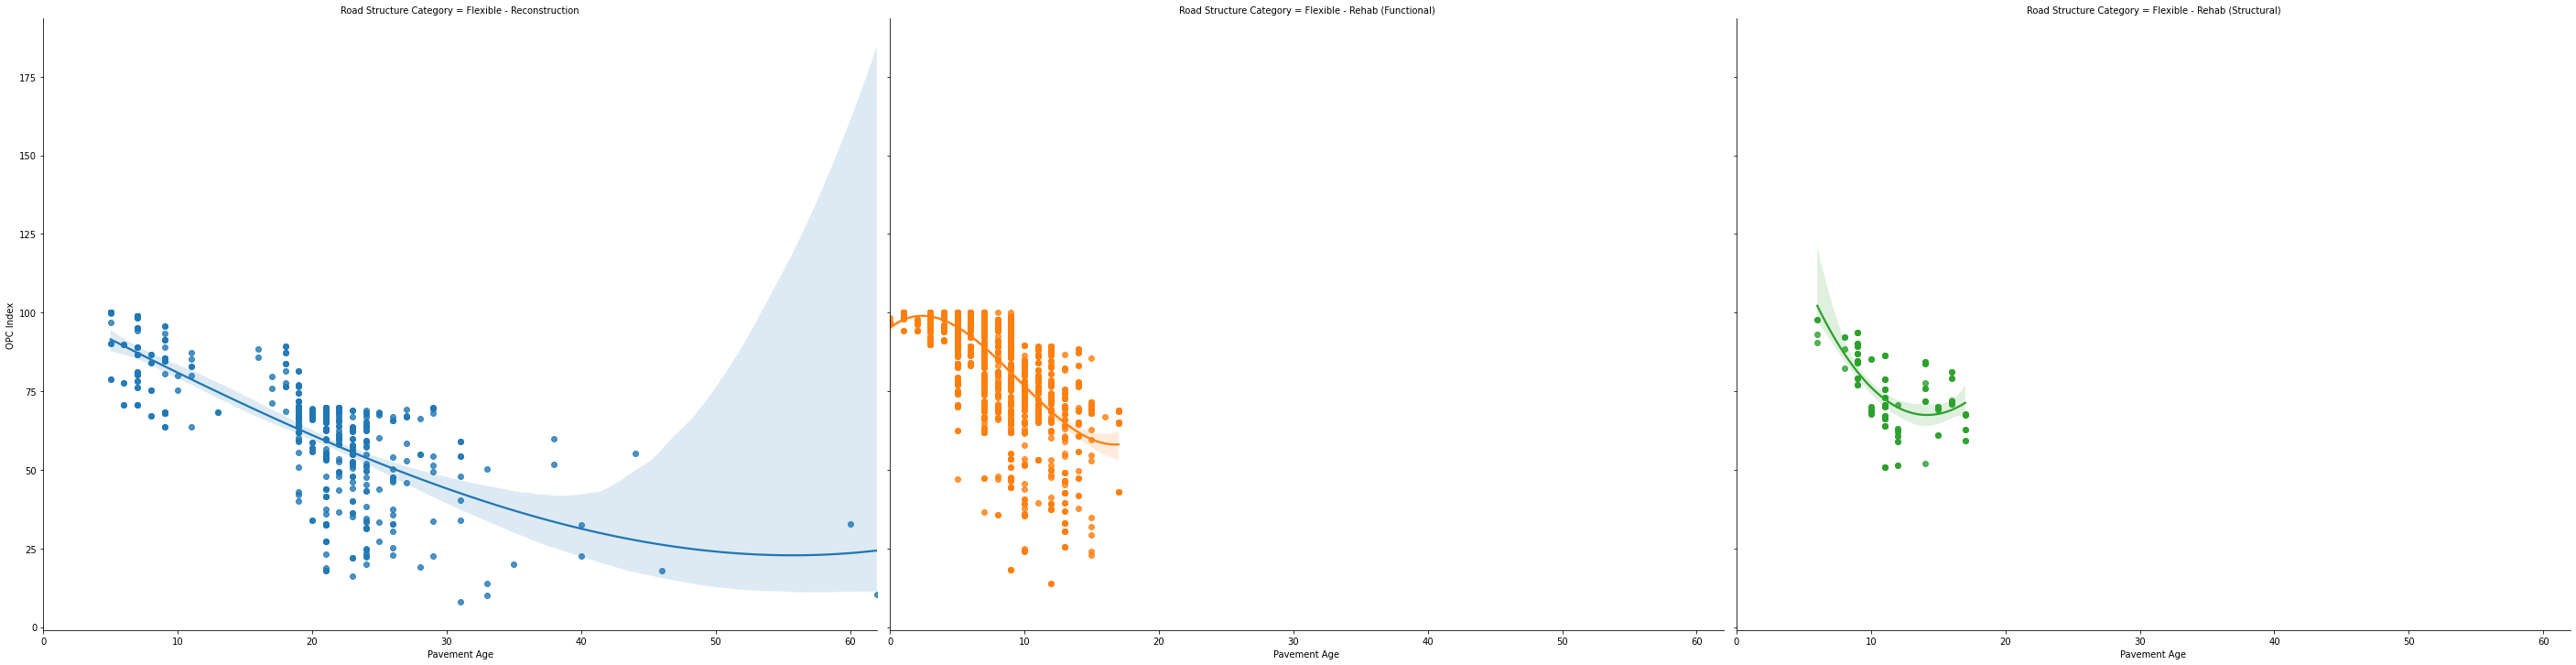

In [39]:
g = sns.lmplot(x="Pavement Age", y="OPC Index", col="Road Structure Category", hue="Road Structure Category", data=xydata_new,
               order=3, truncate=True,height=10, aspect=1.3)

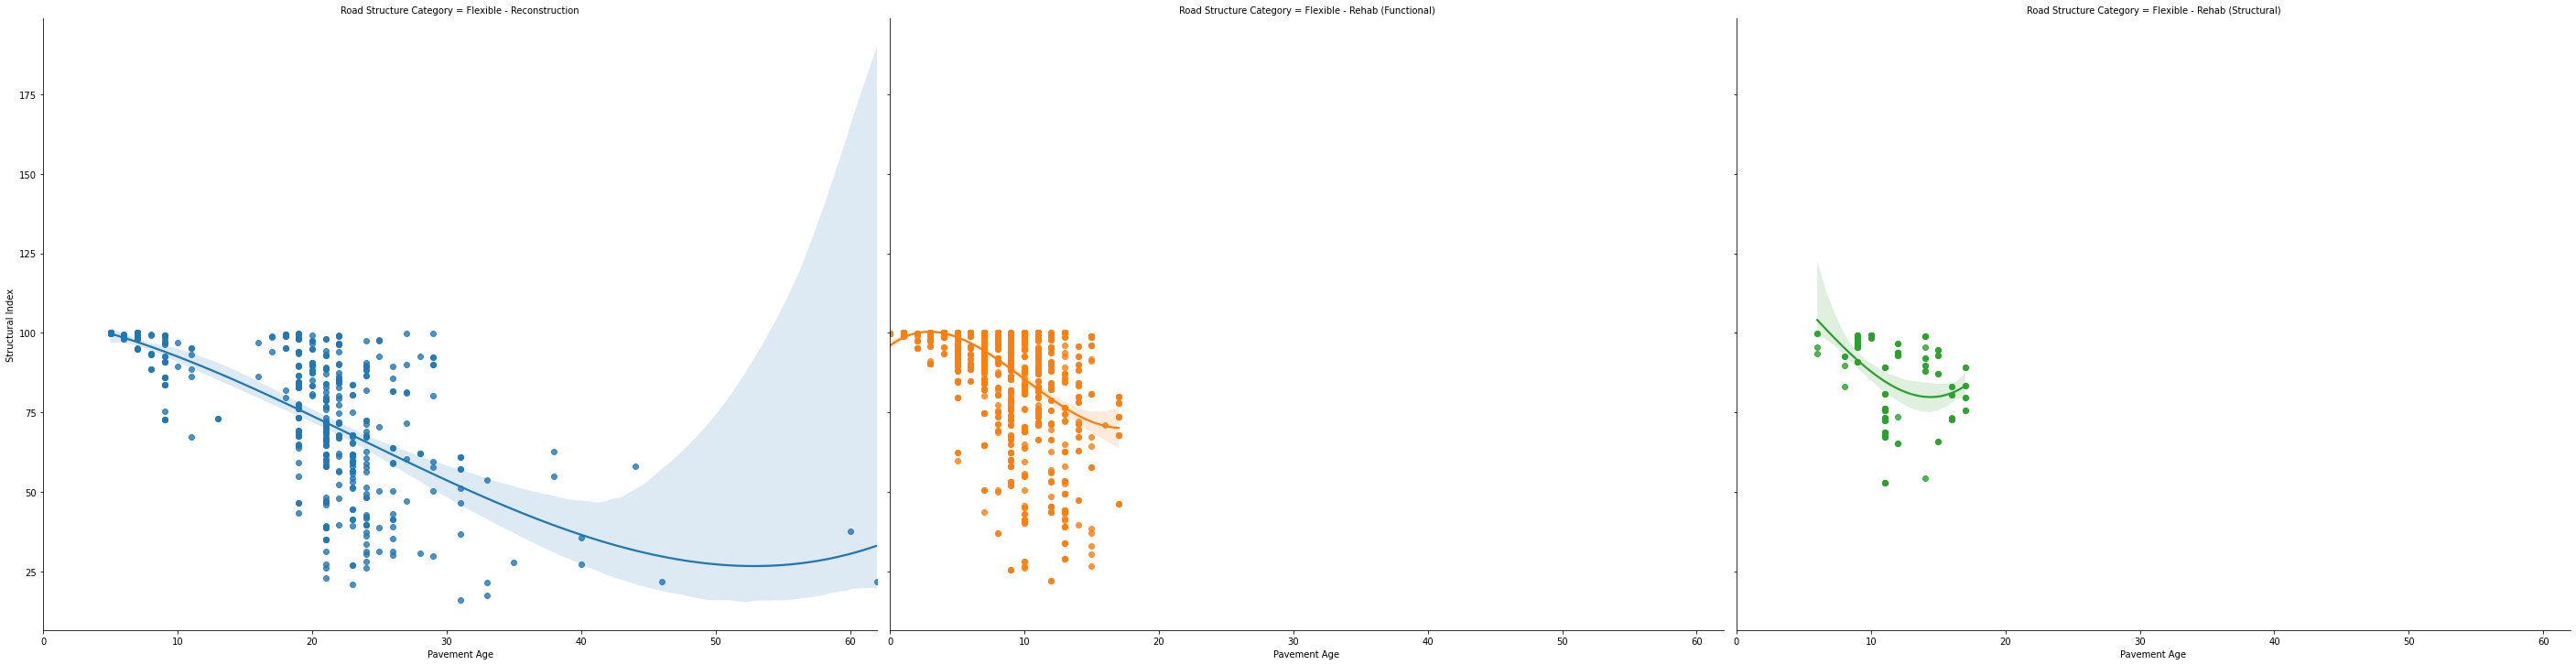

In [41]:
g = sns.lmplot(x="Pavement Age", y="Structural Index", col="Road Structure Category", hue="Road Structure Category", data=xydata_new,
               order=3, truncate=True,height=10, aspect=1.3)

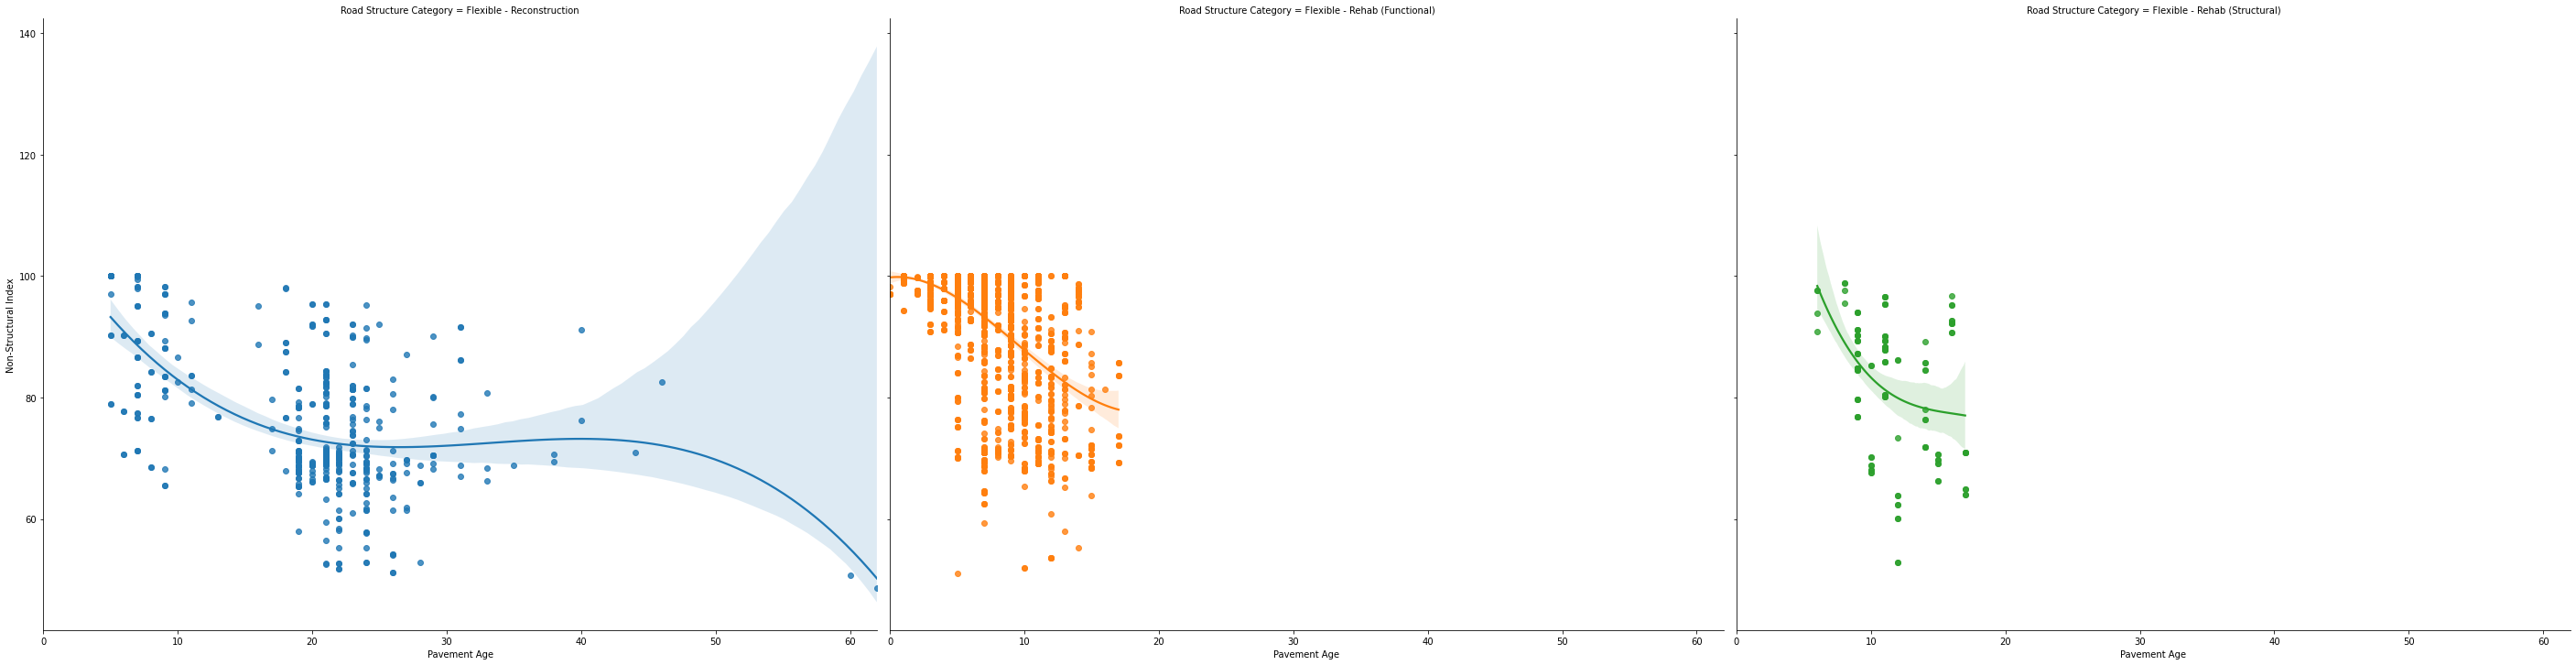

In [42]:
g = sns.lmplot(x="Pavement Age", y="Non-Structural Index", col="Road Structure Category", hue="Road Structure Category", data=xydata_new,
               order=3, truncate=True,height=10, aspect=1.3)

450 126 2206


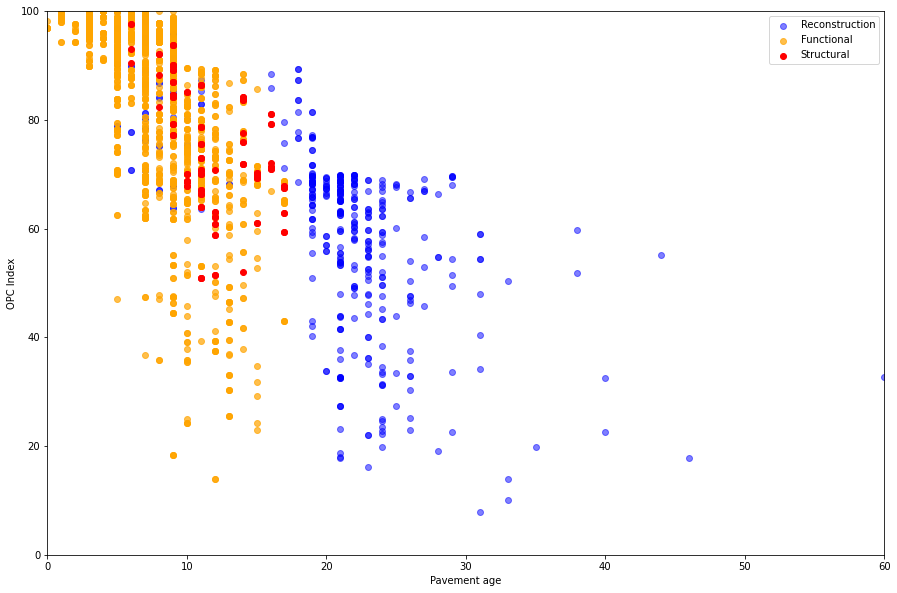

In [44]:
xydata_recon = xydata_new [(xydata_new['Road Structure Category']=='Flexible - Reconstruction')]
xydata_str = xydata_new [(xydata_new['Road Structure Category']=='Flexible - Rehab (Structural)')]
xydata_func = xydata_new [(xydata_new['Road Structure Category']=='Flexible - Rehab (Functional)')]
print (len(xydata_recon),len(xydata_str),len(xydata_func))
ydata_recon =  xydata_recon['OPC Index']
xdata_recon = xydata_recon['Pavement Age']
ydata_str =  xydata_str['OPC Index']
xdata_str = xydata_str['Pavement Age']
ydata_func =  xydata_func['OPC Index']
xdata_func = xydata_func['Pavement Age']
plt.figure(figsize=(15,10))
plt.scatter(xdata_recon, ydata_recon, facecolor='blue', color='blue', alpha=0.5,label='Reconstruction')
plt.scatter(xdata_func, ydata_func, facecolor='orange', color='orange', alpha=0.7,label='Functional')
plt.scatter(xdata_str, ydata_str, facecolor='red', color='red', alpha=1.0,label='Structural')
plt.legend()
plt.xlim(0,60)
plt.ylim(0,100)
plt.xlabel('Pavement age')
plt.ylabel('OPC Index')
plt.show()

70 0 168
count    168.000000
mean      97.470833
std        5.939116
min       69.400000
25%       98.800000
50%       99.000000
75%      100.000000
max      100.000000
Name: OPC Index, dtype: float64
count    168.000000
mean       2.904762
std        2.999477
min        1.000000
25%        1.000000
50%        3.000000
75%        3.000000
max       13.000000
Name: Pavement Age, dtype: float64


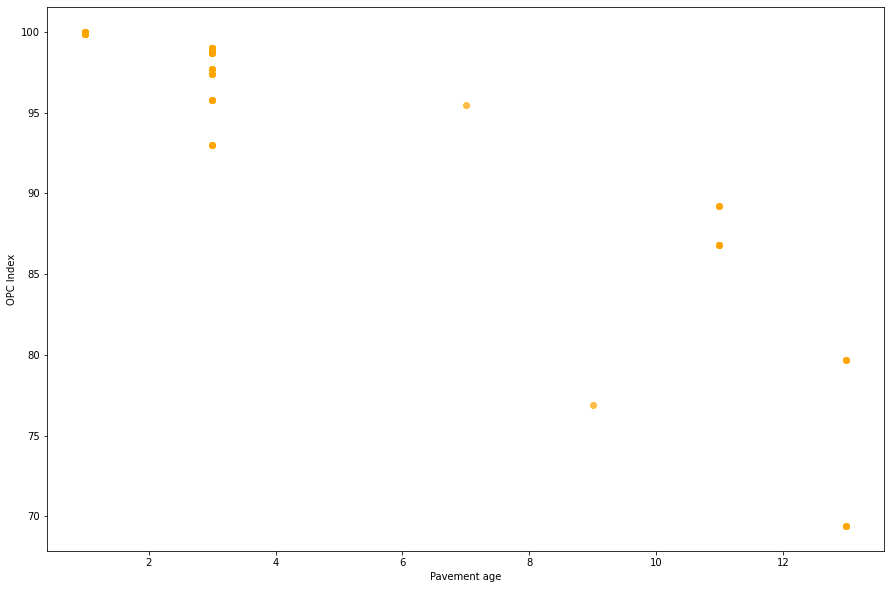

In [46]:
xydata_reconST = xydata_ST [(xydata_ST['Road Structure Category']=='Flexible - Reconstruction')]
xydata_strST = xydata_ST [(xydata_ST['Road Structure Category']=='Flexible - Rehab (Structural)')]
xydata_funcST = xydata_ST [(xydata_ST['Road Structure Category']=='Flexible - Rehab (Functional)')]
print (len(xydata_reconST),len(xydata_strST),len(xydata_funcST))
xdata_reconST =  xydata_reconST['Pavement Age']
ydata_reconST = xydata_reconST['OPC Index']
xdata_funcST =  xydata_funcST['Pavement Age']
ydata_funcST = xydata_funcST['OPC Index']
print(xydata_funcST['OPC Index'].describe())
print(xydata_funcST['Pavement Age'].describe())
plt.figure(figsize=(15,10))
plt.scatter(xdata_funcST, ydata_funcST, facecolor='orange', color='orange', alpha=0.7,label='Functional')
plt.xlabel('Pavement age')
plt.ylabel('OPC Index')
plt.show()

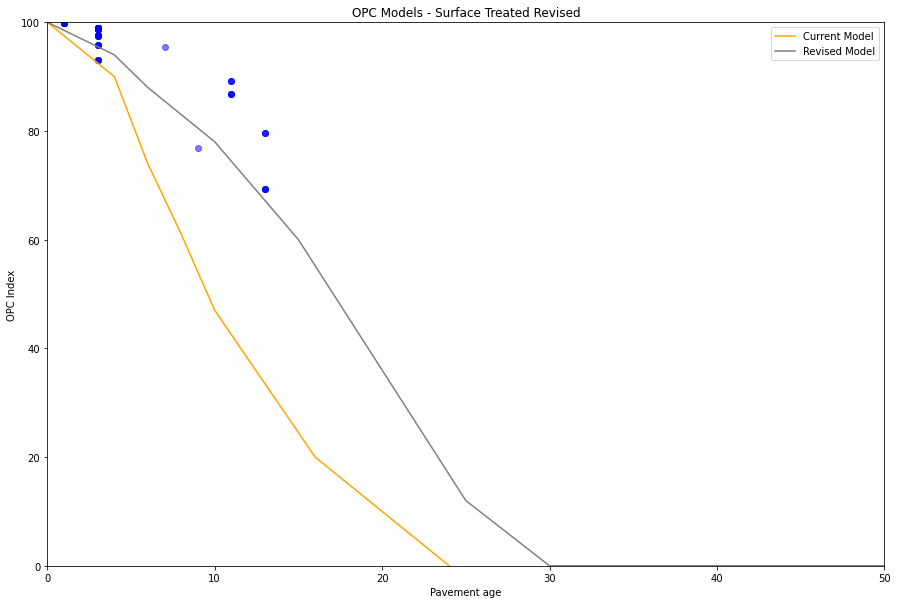

In [47]:
plt.figure(figsize=(15,10))
plt.xlim(0,50)
plt.ylim(0,100)
x1_line_curr =[0,4,6,8,10,16,24]
y1_line_curr =[100,90,74,61,47,20,0]
x1_line_rev =[0,2,4,6,10,15,25, 30, 40,50]
y1_line_rev =[100,97,94, 88, 78,60, 12,0,0,0]
plt.scatter(xydata_funcST["Pavement Age"], xydata_funcST["OPC Index"], facecolor='blue', color='blue', alpha=0.5)
plt.plot(x1_line_curr, y1_line_curr, color= "orange", label= "Current Model")
plt.plot(x1_line_rev, y1_line_rev, color= "grey", label= "Revised Model")
plt.legend()
plt.xlabel('Pavement age')
plt.ylabel('OPC Index')
plt.title ('OPC Models - Surface Treated Revised')
plt.show()

No handles with labels found to put in legend.


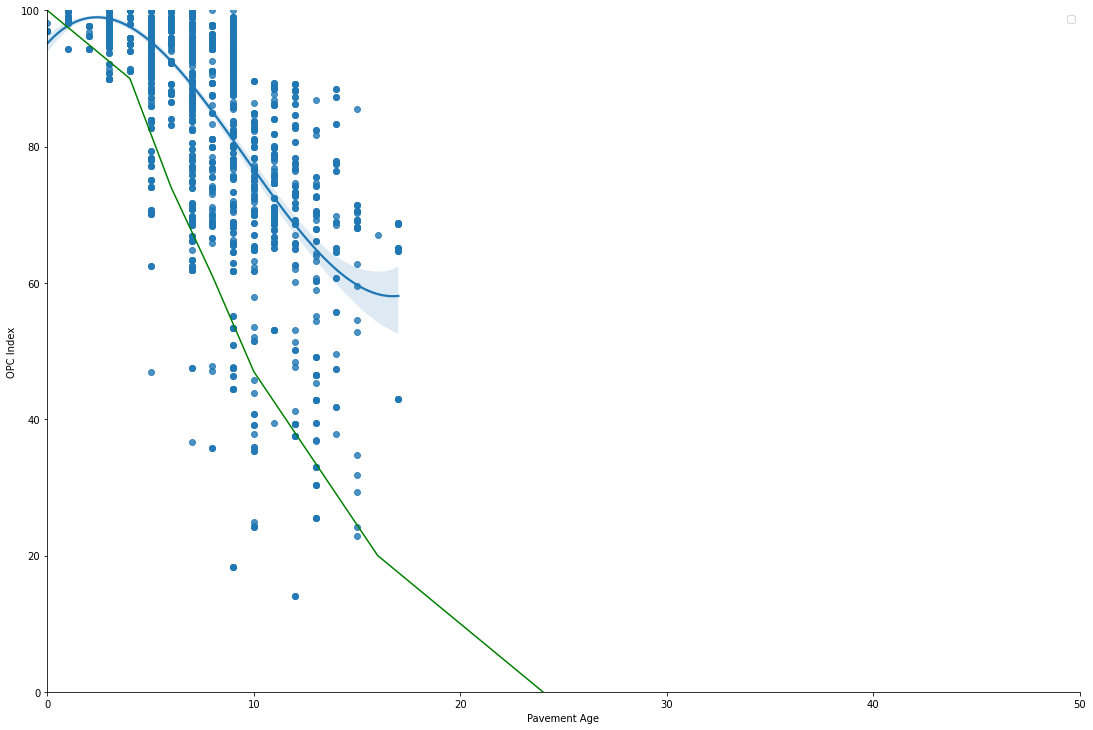

In [48]:
g=sns.lmplot(x="Pavement Age", y="OPC Index",  data=xydata_func,order=3, truncate=True, height=10, aspect=1.5)
x1_line_curr =[0,4,6,8,10,16,24]
y1_line_curr =[100,90,74,61,47,20,0]
plt.xlim(0,50)
plt.ylim(0,100)
plt.legend()
plt.plot(x1_line_curr, y1_line_curr, color= "green", label= "Current Model")

C:\Users\ShafiulAzam\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


y = -2.23264 * x + 0.01382 * x^2 +1.00000
y = -0.42072 * x + -0.16952 * x^2 +1.00000
y = -2.65492 * x + 0.03827 * x^2 +1.00000
[-2.23264226  0.01382008  1.        ]
[-0.42071783 -0.16951586  1.        ]
[-2.65492409  0.03826569  1.        ]
[-471.6264186   113.18578487 -117.37319512    3.11236339   -2.63370389
    3.15746139   -0.49625906]


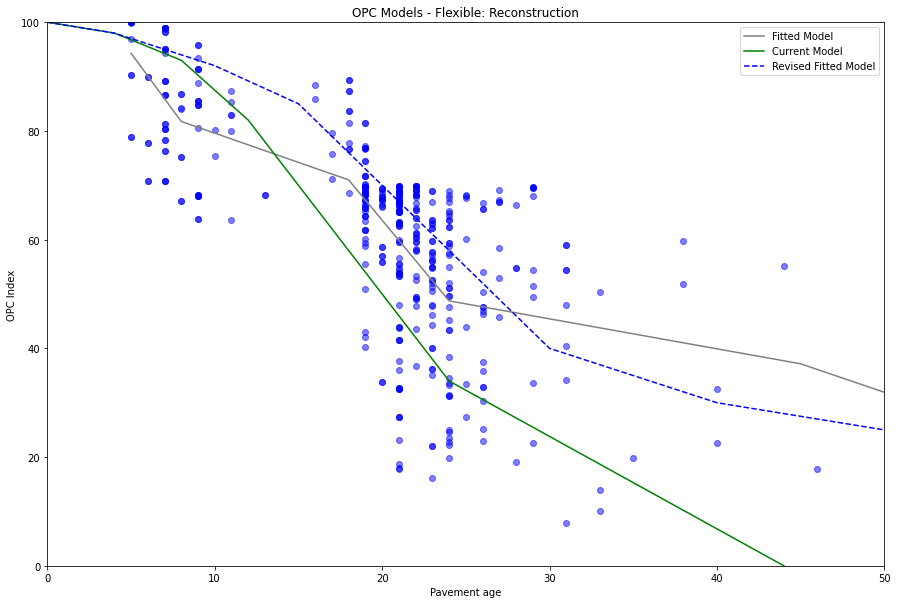

In [49]:
from matplotlib import pyplot
from pylab import *
from scipy import optimize
from scipy.optimize import curve_fit


def objective(x, a, b,c):
    return a * x + b * x**2 + 100

def piecewise_linear(x, b, k1, k2, k3,k4,k5,k6):
    condlist = [x < 5, (x >= 5) & (x < 8), (x >= 8) & (x < 18), (x >= 18) & (x < 24), (x >= 24) & (x < 45), x >= 45]
    funclist = [lambda x: k1*x + b, 
                lambda x: k1*x + b + k2*(x-5), 
                lambda x: k1*x + b + k2*(x-5) + k3*(x - 8),
                lambda x: k1*x + b + k2*(x-5) + k3*(x - 8)+k4*(x - 18),
                lambda x: k1*x + b + k2*(x-5) + k3*(x - 8)+k4*(x - 18)+k5*(x - 24),
                lambda x: k1*x + b + k2*(x-5) + k3*(x - 8)+k4*(x - 18)+k5*(x - 24)+k6*(x - 45)]
    return np.piecewise(x, condlist, funclist)

def piecewise_linear_str(x, b, k1, k2, k3,k4):
    condlist = [x < 8, (x >= 8) & (x < 20), (x >= 20) & (x < 30), x >= 30]
    funclist = [lambda x: k1*x + b, lambda x: k1*x + b + k2*(x-8), lambda x: k1*x + b + k2*(x-8) + k3*(x - 20),
               lambda x: k1*x + b + k2*(x-8) + k3*(x - 20)+k4*(x - 30)]
    return np.piecewise(x, condlist, funclist)


#xydata_recon
p0 = [max(xdata_recon), np.median(xdata_recon),1,min(ydata_recon)] # this is an mandatory initial guess

popt1, _ = curve_fit(objective, xdata_recon, ydata_recon)
popt2, _ = curve_fit(objective, xdata_func, ydata_func)
popt3, _ = curve_fit(objective, xdata_str, ydata_str)
popt4, _ = curve_fit(piecewise_linear, xdata_recon.to_list(), ydata_recon.to_list())


a1, b1, c1 = popt1
a2, b2, c2 = popt2
a3, b3, c3 = popt3
b, k1r, k2r, k3r,k4r,k5r,k6r = popt4

print('y = %.5f * x + %.5f * x^2 +%.5f' % (a1, b1, c1))
print('y = %.5f * x + %.5f * x^2 +%.5f' % (a2, b2, c2))
print('y = %.5f * x + %.5f * x^2 +%.5f' % (a3, b3, c3))

print (popt1)
print (popt2)
print (popt3)
print (popt4)

plt.figure(figsize=(15,10))
plt.scatter(xdata_recon, ydata_recon, facecolor='blue', color='blue', alpha=0.5)

x1_line_curr =[0,4,8,12,24,44]
y1_line_curr =[100,98,93,82,34,0]

x1_line_rev =[0,2,4,6,10, 15, 25, 30, 40, 50]
y1_line_rev =[100,99,98,96, 92, 85, 55, 40, 30,25]

plt.xlim(0,50)
plt.ylim(0,100)

x1_line = arange(min(xdata_recon), max(xdata_recon), 1)
x2_line = arange(min(xdata_func), max(xdata_func), 1)
x3_line = arange(min(xdata_str), max(xdata_str), 1)


y1_line = objective(x1_line, *popt1)
y2_line = objective(x2_line, *popt2)
y3_line = objective(x3_line, *popt3)
y4_line = piecewise_linear(x1_line, *popt4)

plt.plot(x1_line, y4_line, '-', color='grey',label="Fitted Model")
plt.plot(x1_line_curr, y1_line_curr, '-', color='green', label="Current Model")
plt.plot(x1_line_rev, y1_line_rev, '--', color='blue', label="Revised Fitted Model")
plt.legend()
plt.xlabel('Pavement age')
plt.ylabel('OPC Index')
plt.title ('OPC Models - Flexible: Reconstruction')
plt.show()

C:\Users\ShafiulAzam\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


y = -2.23264 * x + 0.01382 * x^2 +1.00000
y = -0.42072 * x + -0.16952 * x^2 +1.00000
y = -2.65492 * x + 0.03827 * x^2 +1.00000
[-2.23264226  0.01382008  1.        ]
[-0.42071783 -0.16951586  1.        ]
[-2.65492409  0.03826569  1.        ]
[135.01894045  -6.71982341   4.86510051   1.           1.        ]


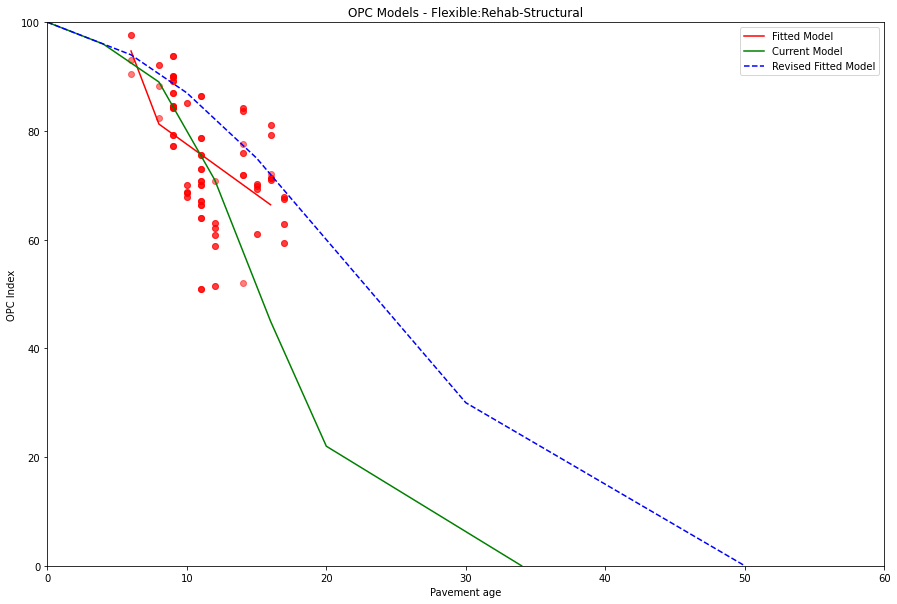

In [50]:
from matplotlib import pyplot
from pylab import *
from scipy import optimize
from scipy.optimize import curve_fit


def objective(x, a, b,c):
    return a * x + b * x**2 + 100

def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0)))+b
    return (y)

def piecewise_linear_str(x, b, k1, k2, k3,k4):
    condlist = [x < 8, (x >= 8) & (x < 20), (x >= 20) & (x < 30), x >= 30]
    funclist = [lambda x: k1*x + b, 
                lambda x: k1*x + b + k2*(x-8), 
                lambda x: k1*x + b + k2*(x-8) + k3*(x - 20),
                lambda x: k1*x + b + k2*(x-8) + k3*(x - 20)+k4*(x - 20)]
    return np.piecewise(x, condlist, funclist)


#xydata_recon
p0 = [max(xdata_recon), np.median(xdata_recon),1,min(ydata_recon)] # this is an mandatory initial guess

popt1, _ = curve_fit(objective, xdata_recon, ydata_recon)
popt2, _ = curve_fit(objective, xdata_func, ydata_func)
popt3, _ = curve_fit(objective, xdata_str, ydata_str)
popt6, _ = curve_fit(piecewise_linear_str, xdata_str.to_list(), ydata_str.to_list())

a1, b1, c1 = popt1
a2, b2, c2 = popt2
a3, b3, c3 = popt3
b, k1s, k2s, k3s,k4s = popt6

#L ,x0, k, b= popt1
print('y = %.5f * x + %.5f * x^2 +%.5f' % (a1, b1, c1))
print('y = %.5f * x + %.5f * x^2 +%.5f' % (a2, b2, c2))
print('y = %.5f * x + %.5f * x^2 +%.5f' % (a3, b3, c3))
print (popt1)
print (popt2)
print (popt3)
print (popt6)

plt.figure(figsize=(15,10))
#plt.scatter(xdata_recon, ydata_recon, facecolor='blue', color='blue', alpha=0.5)
#plt.scatter(xdata_func, ydata_func, facecolor='orange', color='orange', alpha=0.5)
plt.scatter(xdata_str, ydata_str, facecolor='red', color='red', alpha=0.5)

x1_line_curr =[0,4,8,12,16,20,34]
y1_line_curr =[100,96,89,71,45,22,0]


x1_line_rev =[0,2,4,6,10,15,25,30,40,50]
y1_line_rev =[100,98,96,94,87, 75,45,30,15,0]

plt.xlim(0,60)
plt.ylim(0,100)
x1_line = arange(min(xdata_recon), max(xdata_recon), 1)
x2_line = arange(min(xdata_func), max(xdata_func), 1)
x3_line = arange(min(xdata_str), max(xdata_str), 1)


y1_line = objective(x1_line, *popt1)
y2_line = objective(x2_line, *popt2)
y3_line = objective(x3_line, *popt3)
#y4_line = piecewise_linear(x1_line, *popt4)
#y5_line = piecewise_linear(x2_line, *popt5)
y6_line = piecewise_linear_str(x3_line, *popt6)


#plt.plot(x1_line, y1_line, '--', color='blue')
#plt.plot(x2_line, y2_line, '--', color='orange')
#plt.plot(x3_line, y3_line, '--', color='red')
plt.plot(x3_line, y6_line, '-', color='red',label="Fitted Model")
#plt.plot(x2_line, y5_line, '--', color='orange')
#plt.plot(x3_line, y6_line, '--', color='red')
plt.plot(x1_line_curr, y1_line_curr, '-', color='green', label="Current Model")
plt.plot(x1_line_rev, y1_line_rev, '--', color='blue', label="Revised Fitted Model")
plt.legend()
plt.xlabel('Pavement age')
plt.ylabel('OPC Index')
plt.title ('OPC Models - Flexible:Rehab-Structural')
plt.show()

C:\Users\ShafiulAzam\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


y = -2.23264 * x + 0.01382 * x^2 +1.00000
y = -0.42072 * x + -0.16952 * x^2 +1.00000
y = -2.65492 * x + 0.03827 * x^2 +1.00000
[-2.23264226  0.01382008  1.        ]
[-0.42071783 -0.16951586  1.        ]
[-2.65492409  0.03826569  1.        ]
[104.07880035  -2.13910746  -2.24581528   1.           1.        ]


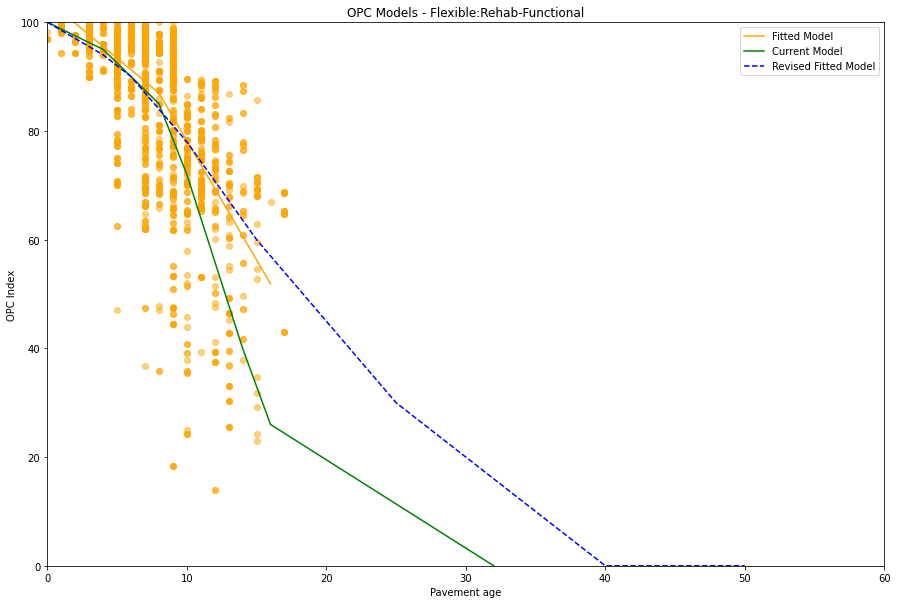

In [51]:
from matplotlib import pyplot
from pylab import *
from scipy import optimize
from scipy.optimize import curve_fit


def objective(x, a, b,c):
    return a * x + b * x**2 + 100

def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0)))+b
    return (y)

def piecewise_linear_str(x, b, k1, k2, k3,k4):
    condlist = [x < 8, (x >= 8) & (x < 20), (x >= 20) & (x < 30), x >= 30]
    funclist = [lambda x: k1*x + b, 
                lambda x: k1*x + b + k2*(x-8), 
                lambda x: k1*x + b + k2*(x-8) + k3*(x - 20),
                lambda x: k1*x + b + k2*(x-8) + k3*(x - 20)+k4*(x - 20)]
    return np.piecewise(x, condlist, funclist)


#xydata_recon
p0 = [max(xdata_recon), np.median(xdata_recon),1,min(ydata_recon)] # this is an mandatory initial guess

popt1, _ = curve_fit(objective, xdata_recon, ydata_recon)
popt2, _ = curve_fit(objective, xdata_func, ydata_func)
popt3, _ = curve_fit(objective, xdata_str, ydata_str)
#popt4, _ = curve_fit(piecewise_linear, xdata_recon.to_list(), ydata_recon.to_list())
popt5, _ = curve_fit(piecewise_linear_str, xdata_func.to_list(), ydata_func.to_list())
#popt6, _ = curve_fit(piecewise_linear_str, xdata_str.to_list(), ydata_str.to_list())



#popt1, pcov = curve_fit(sigmoid, xdata_new, ydata_new,p0, method='dogbox')
#popt1, pcov = curve_fit(piecewise_linear, xdata_new, ydata_new)


a1, b1, c1 = popt1
a2, b2, c2 = popt2
a3, b3, c3 = popt3
#b, k1r, k2r, k3r,k4r,k5r,k6r = popt4
b, k1f, k2f, k3f,k4f = popt5
#b, k1s, k2s, k3s,k4s = popt6

#L ,x0, k, b= popt1
print('y = %.5f * x + %.5f * x^2 +%.5f' % (a1, b1, c1))
print('y = %.5f * x + %.5f * x^2 +%.5f' % (a2, b2, c2))
print('y = %.5f * x + %.5f * x^2 +%.5f' % (a3, b3, c3))
#print('y = %.5f/(1+ exp(-%.5f*(x-%.5f)))+%.5f' % (L ,x0, k, b))
print (popt1)
print (popt2)
print (popt3)
#print (popt4)
print (popt5)
#print (popt6)

plt.figure(figsize=(15,10))
#plt.scatter(xdata_recon, ydata_recon, facecolor='blue', color='blue', alpha=0.5)
plt.scatter(xdata_func, ydata_func, facecolor='orange', color='orange', alpha=0.5)
#plt.scatter(xdata_str, ydata_str, facecolor='red', color='red', alpha=0.5)

x1_line_curr =[0,4,8,10,14,16,32]
y1_line_curr =[100,95,85,72,40,26,0]

#x1_line_rev =[0,2,4,6,10,15,25,30,40,50]
#y1_line_rev =[100,97,94,92,85,70,35,20,0,0]
x1_line_rev =[0,2,4,6,10,15,25,30,40,50]
y1_line_rev =[100,97,94,90,78,60,30,20,0,0]

plt.xlim(0,60)
plt.ylim(0,100)
x1_line = arange(min(xdata_recon), max(xdata_recon), 1)
x2_line = arange(min(xdata_func), max(xdata_func), 1)
x3_line = arange(min(xdata_str), max(xdata_str), 1)


y1_line = objective(x1_line, *popt1)
y2_line = objective(x2_line, *popt2)
y3_line = objective(x3_line, *popt3)
#y4_line = piecewise_linear(x1_line, *popt4)
y5_line = piecewise_linear_str(x2_line, *popt5)
#y6_line = piecewise_linear_str(x3_line, *popt6)


#plt.plot(x1_line, y1_line, '--', color='blue')
#plt.plot(x2_line, y2_line, '--', color='orange')
#plt.plot(x3_line, y3_line, '--', color='red')
plt.plot(x2_line, y5_line, '-', color='orange',label="Fitted Model")
#plt.plot(x2_line, y5_line, '--', color='orange')
#plt.plot(x3_line, y6_line, '--', color='red')
plt.plot(x1_line_curr, y1_line_curr, '-', color='green', label="Current Model")
plt.plot(x1_line_rev, y1_line_rev, '--', color='blue', label="Revised Fitted Model")
plt.legend()
plt.xlabel('Pavement age')
plt.ylabel('OPC Index')
plt.title ('OPC Models - Flexible:Rehab-Functional')
plt.show()

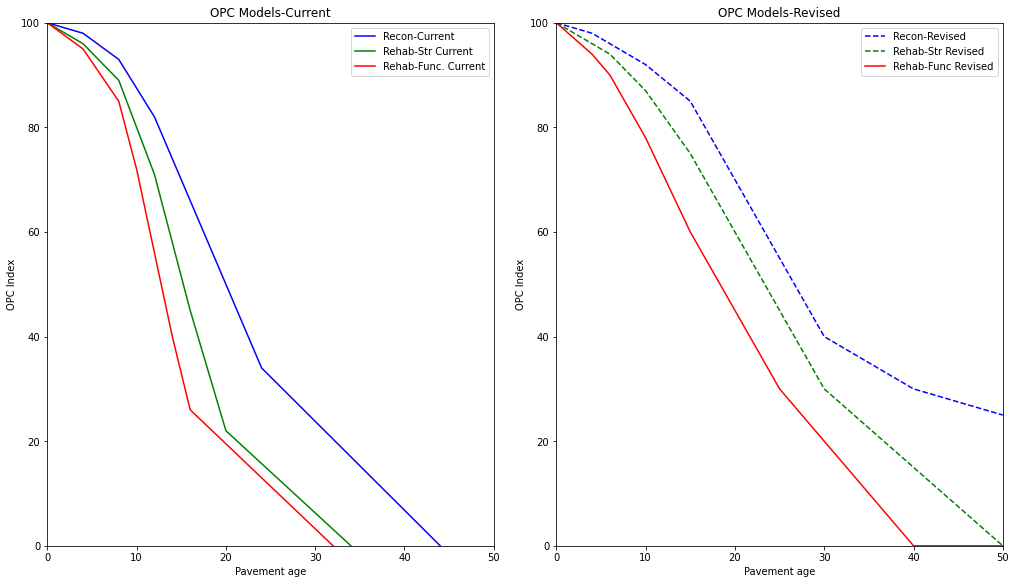

In [52]:
fig, (ax0, ax1) = plt.subplots(ncols=2, constrained_layout=True, figsize=(14,8))



x1_line_curr =[0,4,8,12,24,44]
y1_line_curr =[100,98,93,82,34,0]
x2_line_curr =[0,4,8,12,16,20,34]
y2_line_curr =[100,96,89,71,45,22,0]
x3_line_curr =[0,4,8,10,14,16,32]
y3_line_curr =[100,95,85,72,40,26,0]

ax0.set_xlim(0,50)
ax0.set_ylim(0,100)
ax0.plot(x1_line_curr, y1_line_curr, '-', color='blue', label="Recon-Current")
ax0.plot(x2_line_curr, y2_line_curr, '-', color='green', label="Rehab-Str Current")
ax0.plot(x3_line_curr, y3_line_curr, '-', color='red', label="Rehab-Func. Current")
ax0.legend()
ax0.legend(loc="upper right")
ax0.set_xlabel('Pavement age')
ax0.set_ylabel('OPC Index')
ax0.set_title ('OPC Models-Current')

x1_line_rev =[0,2,4,6,10,15,25,30,40,50]
y1_line_rev =[100,99,98,96,92,85,55,40,30,25]
x2_line_rev =[0,2,4,6,10,15,25,30,40,50]
y2_line_rev =[100,98,96,94,87, 75,45,30,15,0]
x3_line_rev =[0,2,4,6,10,15,25,30,40,50]
y3_line_rev =[100,97,94,90,78,60,30,20,0,0]

ax1.set_xlim(0,50)
ax1.set_ylim(0,100)
ax1.plot(x1_line_rev, y1_line_rev, '--', color='blue', label="Recon-Revised")
ax1.plot(x2_line_rev, y2_line_rev, '--', color='green', label="Rehab-Str Revised")
ax1.plot(x3_line_rev, y3_line_rev, '-', color='red', label="Rehab-Func Revised")
ax1.legend()
ax1.legend(loc="upper right")
ax1.set_xlabel('Pavement age')
ax1.set_ylabel('OPC Index')
ax1.set_title ('OPC Models-Revised')

plt.show()

In [81]:
#create a dataset with 2019 distress data and NMF file
dt_19_dist_nmf= pd.merge(left=df_dist2019[['Route',
'Lane',
'Begin Mile',
'End Mile',
'OPC Index',
'Structural Index',
'Non-Structural Index'                           
]], right=df_nmf, how='left', left_on='Route', right_on='Route')
dt_19_dist_nmf.head(2)

,Route,Lane,Begin Mile_x,End Mile_x,OPC Index_x,Structural Index_x,Non-Structural Index_x,MGMT_SECTION_SET_ID,Video Log Link,Direction,...,HQ Owner,Last Chip Seal Year,Years Since Last Chipseal,Last Crack Sealing Year,Years Since Last Crack Seal,Year of Last Preservation,Years Since Last Preservation,Preservation Count,RSL,Is Ramp?
0,KC-00001-F,All,0.0,0.12,82.3,83.8,92.0,Normal Analysis Sections,Video,N/E,...,Headquarters,NaN,NaN,NaN,NaN,NaN,NaN,0.0,13.8210,No
1,KC-00001-F,All,0.0,0.12,82.3,83.8,92.0,Normal Analysis Sections,Video,N/E,...,Headquarters,NaN,NaN,NaN,NaN,NaN,NaN,0.0,13.7578,No


In [83]:
dt_19_dist_nmf.columns

Index(['Route', 'Lane', 'Begin Mile_x', 'End Mile_x', 'OPC Index_x',
       'Structural Index_x', 'Non-Structural Index_x', 'MGMT_SECTION_SET_ID',
       'Video Log Link', 'Direction',
       ...
       'HQ Owner', 'Last Chip Seal Year', 'Years Since Last Chipseal',
       'Last Crack Sealing Year', 'Years Since Last Crack Seal',
       'Year of Last Preservation', 'Years Since Last Preservation',
       'Preservation Count', 'RSL', 'Is Ramp?'],
      dtype='object', length=142)

In [84]:
dt_19_dist_nmf[['Route', 'Begin Mile_x', 'End Mile_x', 'Begin Mile_y', 'End Mile_y']]

,Route,Begin Mile_x,End Mile_x,Begin Mile_y,End Mile_y
0,KC-00001-F,0.00,0.12,0.00,0.81
1,KC-00001-F,0.00,0.12,0.81,1.38
2,KC-00001-F,0.12,0.22,0.00,0.81
3,KC-00001-F,0.12,0.22,0.81,1.38
4,KC-00001-F,0.22,0.31,0.00,0.81
...,...,...,...,...,...
258349,SC-307555-F,0.00,0.10,0.11,0.19
258350,SC-307556-F,0.00,0.10,0.00,0.12
258351,SC-307556-F,0.10,0.12,0.00,0.12
258352,SC-307560-F,0.00,0.04,0.00,0.04


In [85]:
print ('Before:',len(dt_19_dist_nmf))
dt_19_dist_nmf =dt_19_dist_nmf[(dt_19_dist_nmf['End Mile_x'] <= dt_19_dist_nmf['End Mile_y']) & 
         (dt_19_dist_nmf['Begin Mile_x'] >= dt_19_dist_nmf['Begin Mile_y'])]
print ('After:', len(dt_19_dist_nmf))

Before: 258354
After: 56135


In [87]:
exceptions = []
for i in dt_19_dist_nmf[
    ((dt_19_dist_nmf['Pavement Age']>=10)& (dt_19_dist_nmf['OPC Index_x']>90)) |
    ((dt_19_dist_nmf['Pavement Age']>=20)& (dt_19_dist_nmf['OPC Index_x']>70)) |
    ((dt_19_dist_nmf['Pavement Age']>=30)& (dt_19_dist_nmf['OPC Index_x']>60))|
    ((dt_19_dist_nmf['Pavement Age']<5)& (dt_19_dist_nmf['OPC Index_x']<90))].index:
    exceptions.append(i)
len(exceptions)

20381

In [88]:
#get rid off exceptions:
dt_19_dist_nmf= dt_19_dist_nmf[~dt_19_dist_nmf.index.isin(exceptions)]
#adjust age:
dt_19_dist_nmf['Pavement Age'] = dt_19_dist_nmf['Pavement Age'].apply(lambda x: x - 1)
dt_19_dist_nmf=dt_19_dist_nmf[dt_19_dist_nmf['Pavement Age']>=0]
print(len(dt_19_dist_nmf))
print(dt_19_dist_nmf['Pavement Type'].value_counts())

22613
Asphalt      10533
ST            6958
Composite     4799
PCC            323
Name: Pavement Type, dtype: int64


In [89]:
xy19data_PCC = dt_19_dist_nmf[dt_19_dist_nmf['Pavement Type']=='PCC']
xy19data_PCC['Pavement Type'].value_counts()

PCC    323
Name: Pavement Type, dtype: int64

156 13 68


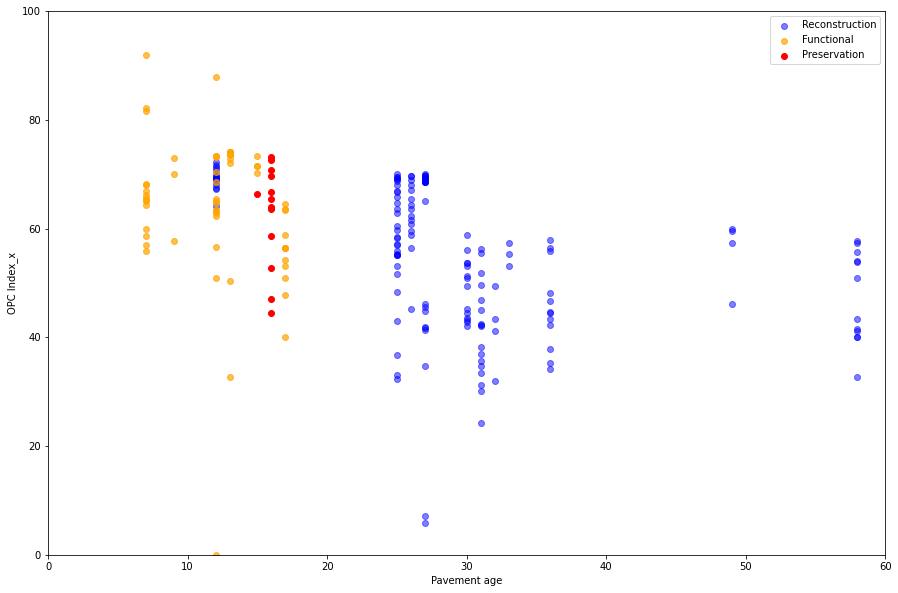

In [100]:
xy19data_reconPCC = xy19data_PCC [(xy19data_PCC['Road Structure Category']=='Rigid - Reconstruction')]
xy19data_presPCC = xy19data_PCC [(xy19data_PCC['Road Structure Category']=='Rigid - Preservation')]
xy19data_funcPCC = xy19data_PCC [(xy19data_PCC['Road Structure Category']=='Rigid - Rehab (Functional)')]
print (len(xy19data_reconPCC),len(xy19data_presPCC),len(xy19data_funcPCC))
x19data_reconPCC =  xy19data_reconPCC['Pavement Age']
y19data_reconPCC = xy19data_reconPCC['OPC Index_x']
x19data_funcPCC =  xy19data_funcPCC['Pavement Age']
y19data_funcPCC = xy19data_funcPCC['OPC Index_x']
x19data_presPCC =  xy19data_presPCC['Pavement Age']
y19data_presPCC = xy19data_presPCC['OPC Index_x']

plt.figure(figsize=(15,10))
plt.scatter(x19data_reconPCC, y19data_reconPCC, facecolor='blue', color='blue', alpha=0.5,label='Reconstruction')
plt.scatter(x19data_funcPCC, y19data_funcPCC, facecolor='orange', color='orange', alpha=0.7,label='Functional')
plt.scatter(x19data_presPCC, y19data_presPCC, facecolor='red', color='red', alpha=1.0,label='Preservation')
plt.legend()
plt.xlim(0,60)
plt.ylim(0,100)
plt.xlabel('Pavement age')
plt.ylabel('OPC Index_x')
plt.show()

In [93]:
#Export to csv: combined 2017-2019 file for asphalt file -Less Number of Records
xydata_new.to_csv(r'C:/Users/ShafiulAzam/Documents/Kercher Projects/DelDOT/combinedAsphalt17_19.csv', index = False)
#Export to csv: Individual 2019 file - More Records
dt_19_dist_nmf.to_csv(r'C:/Users/ShafiulAzam/Documents/Kercher Projects/DelDOT/allTypes_19.csv', index = False)

In [94]:
xy19data_PCC['Road Structure Category'].value_counts()

Rigid - Reconstruction        156
Composite                      77
Rigid - Rehab (Functional)     68
Rigid - Preservation           13
Flexible - Reconstruction       9
Name: Road Structure Category, dtype: int64